In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

plt.style.use("ggplot")

In [2]:
df = pd.read_csv('Video_games_esrb_rating.csv')
print(f'df shape: {df.shape}')
df.head()

df shape: (1895, 34)


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [3]:
# no_desc = df[df['no_descriptors'] == 1].copy()

# for col in no_desc.columns:
#     if col == "title" or col == "console":
#         continue

#     print(col)
#     print(no_desc[col].value_counts())
#     print('------------------------------')

# Dropping no descriptors

In [4]:
# df = df[df['no_descriptors'] == 0]
# df = df.drop(columns=['no_descriptors'])

A column is incorrectly named, we fix that here

In [5]:
df = df.rename(columns={"strong_janguage": "strong_language"})

# Checking for NULL and NaN values

In [6]:
df[df.isna().any(axis=1)].shape[0]

0

In [7]:
df[df.isnull().any(axis=1)].shape[0]

0

# Listing all column names

In [8]:
df.columns

Index(['title', 'console', 'alcohol_reference', 'animated_blood', 'blood',
       'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference',
       'fantasy_violence', 'intense_violence', 'language', 'lyrics',
       'mature_humor', 'mild_blood', 'mild_cartoon_violence',
       'mild_fantasy_violence', 'mild_language', 'mild_lyrics',
       'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity',
       'partial_nudity', 'sexual_content', 'sexual_themes',
       'simulated_gambling', 'strong_language', 'strong_sexual_content',
       'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol',
       'violence', 'esrb_rating'],
      dtype='object')

# Correlation Matrix

<AxesSubplot:>

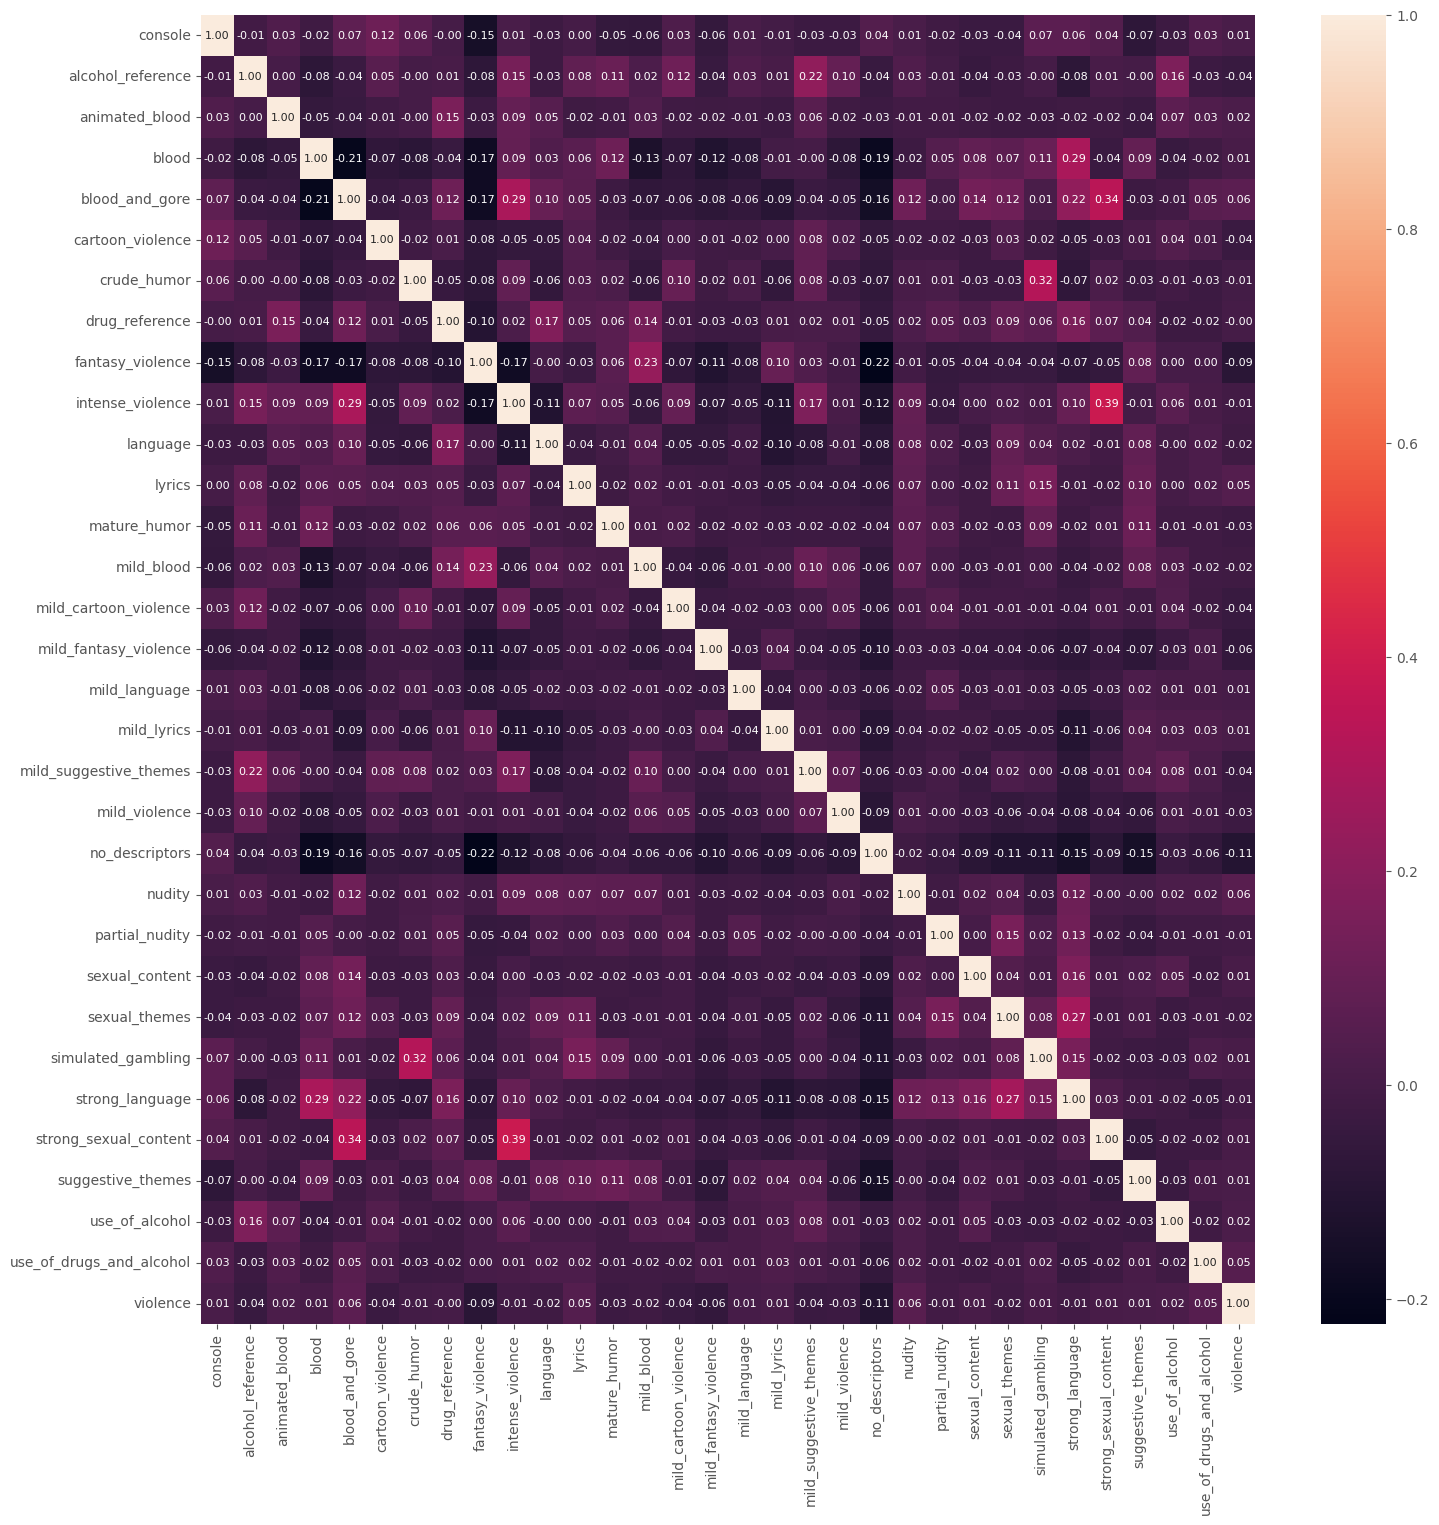

In [9]:
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(
    df.drop(columns=['title', 'esrb_rating']).corr(),
    annot=True,
    ax=ax,
    annot_kws={"fontsize": 8},
    fmt=".2f")

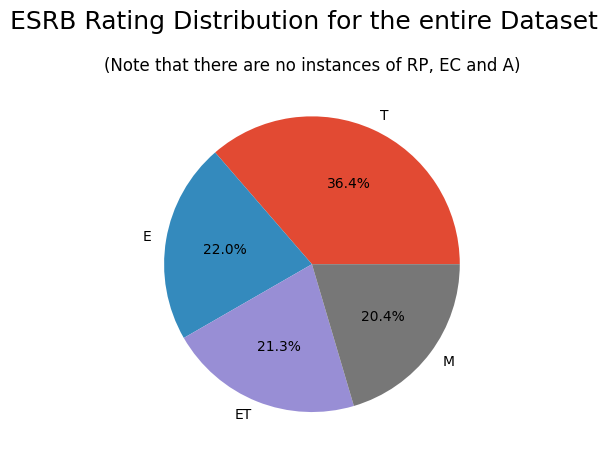

In [10]:
plt.pie(df["esrb_rating"].value_counts(), labels=df["esrb_rating"].value_counts().index, autopct='%1.1f%%')
plt.title("(Note that there are no instances of RP, EC and A)",fontsize=12)
plt.suptitle("ESRB Rating Distribution for the entire Dataset", fontsize=18, y=1.025)
plt.show()

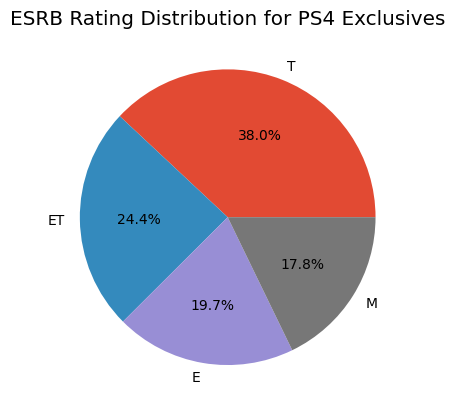

In [11]:
ps4_exclusives = df[df["console"] == 0]
plt.pie(ps4_exclusives["esrb_rating"].value_counts(), labels=ps4_exclusives["esrb_rating"].value_counts().index, autopct='%1.1f%%')
plt.title("ESRB Rating Distribution for PS4 Exclusives")
plt.show()

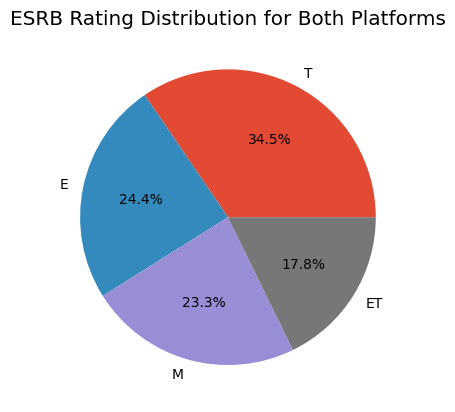

In [12]:
both_platforms = df[df["console"] == 1]
plt.pie(both_platforms["esrb_rating"].value_counts(), labels=both_platforms["esrb_rating"].value_counts().index, autopct='%1.1f%%')
plt.title("ESRB Rating Distribution for Both Platforms")
plt.show()

In [13]:
df[df['esrb_rating'] == 'E'].drop(columns=['title'])['console'].value_counts()

1    220
0    196
Name: console, dtype: int64

In [14]:
stats = ...

for val in df['esrb_rating'].unique():
    stats = df[df['esrb_rating'] == val].drop(columns=['console'])

    # plt.figure(figsize=(10, 8))
    # # plt.barh(stats.columns, stats.loc['count'])
    # # plt.barh(stats.columns, stats.value_counts())
    # plt.title(f'Count values for {val} games')
    # plt.show()

    break

    # stats = stats.T
    # top5 = stats.sort_values(by='count', ascending=False)
    # top5 = top5.iloc[:5]
    # print(top5['count'])

stats['alcohol_reference'].value_counts()[1]

14

In [15]:
PCA(n_components=5).fit_transform(df.drop(columns=['title', 'esrb_rating']))

array([[-0.56561905, -0.64258476, -0.43213212, -0.36783938,  0.1183676 ],
       [-0.56701152, -0.10019449,  0.0702363 ,  0.35068325, -0.75401859],
       [-0.59012738,  0.90324566,  0.42843754, -0.4607224 ,  0.2389211 ],
       ...,
       [ 0.26836228, -0.37804833, -0.8700519 , -0.20062516,  0.13901296],
       [ 0.27280193,  0.6963597 , -0.28261185, -0.38832619, -0.1370407 ],
       [-0.56561905, -0.64258476, -0.43213212, -0.36783938,  0.1183676 ]])

In [16]:
copy_df = df.copy()
copy_df = copy_df[copy_df['no_descriptors'] == 1]
copy_df.describe()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.0,322.0,322.000000,322.000000,322.0,322.000000,322.000000,322.0,322.000000
mean,0.521739,0.031056,0.003106,0.055901,0.009317,0.003106,0.021739,0.015528,0.015528,0.031056,...,0.003106,0.0,0.0,0.006211,0.012422,0.0,0.012422,0.006211,0.0,0.006211
std,0.500305,0.173739,0.055728,0.230087,0.096222,0.055728,0.146057,0.123832,0.123832,0.173739,...,0.055728,0.0,0.0,0.078688,0.110934,0.0,0.110934,0.078688,0.0,0.078688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000


In [17]:
# pd.plotting.scatter_matrix(df, alpha=0.2)

# dont bother running 34x34 graph aanay

In [18]:
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


<AxesSubplot:xlabel='esrb_rating'>

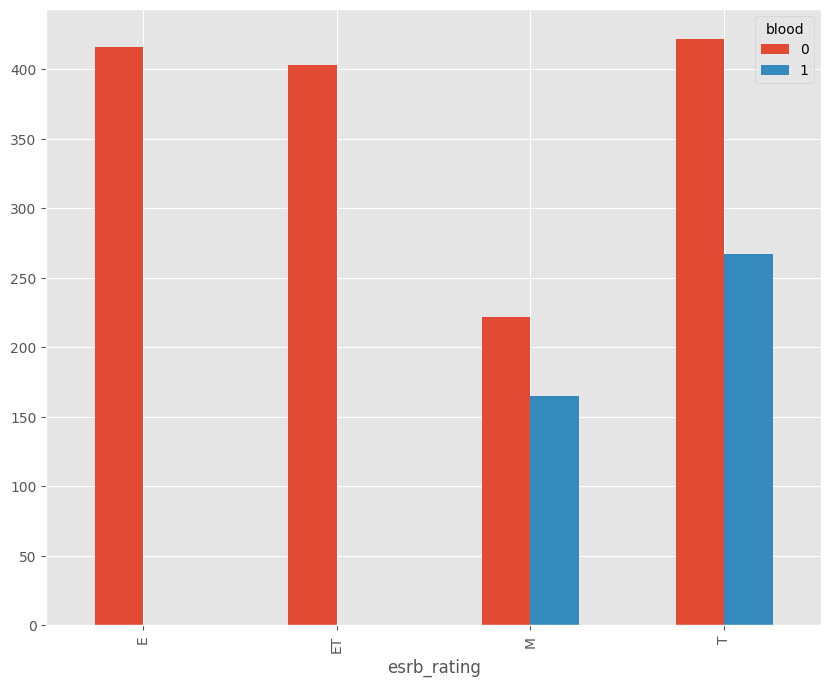

In [19]:
copy_df = df.copy()
copy_df.set_index('esrb_rating', inplace=True)
# copy_df.groupby('console').head()
copy_df = copy_df.pivot_table(index='esrb_rating', columns='blood', aggfunc='count')
copy_df['title'].plot(kind='bar', figsize=(10, 8))

In [20]:
copy_df['title']

blood,0,1
esrb_rating,,
E,416.0,NaN
ET,403.0,NaN
M,222.0,165.0
T,422.0,267.0


In [21]:
copy_df

alcohol_reference        animated_blood        blood_and_gore  \
blood                       0      1              0      1              0   
esrb_rating                                                                 
E                       416.0    NaN          416.0    NaN          416.0   
ET                      403.0    NaN          403.0    NaN          403.0   
M                       222.0  165.0          222.0  165.0          222.0   
T                       422.0  267.0          422.0  267.0          422.0   

                   cartoon_violence        console         ...  \
blood            1                0      1       0      1  ...   
esrb_rating                                                ...   
E              NaN            416.0    NaN   416.0    NaN  ...   
ET             NaN            403.0    NaN   403.0    NaN  ...   
M            165.0            222.0  165.0   222.0  165.0  ...   
T            267.0            422.0  267.0   422.0  267.0  ...   

            suggestive_themes         title        use_of_alcohol         \
blood                       0      1      0      1              0      1   
esrb_rating                                                                
E                       416.0    NaN  416.0    NaN          416.0    NaN   
ET                      403.0    NaN  403.0    NaN          403.0    NaN   
M                       222.0  165.0  222.0  165.0          222.0  165.0   
T                       422.0  267.0  422.0  267.0          422.0  267.0   

            use_of_drugs_and_alcohol        violence         
blood                              0      1        0      1  
esrb_rating                                                  
E                              416.0    NaN    416.0    NaN  
ET                             403.0    NaN    403.0    NaN  
M                              222.0  165.0    222.0  165.0  
T                              422.0  267.0    422.0  267.0  

[4 rows x 64 columns]

In [22]:
cpy = df.copy()
cpy = cpy[cpy["no_descriptors"] == 0]
cpy.drop(columns=["no_descriptors", "title", "esrb_rating"], inplace=True)

temp = cpy.sum(axis=1).sort_values()
temp = temp[temp == 0].index
df.loc[temp]

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
1265,Old Man's Journey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
639,Everybody's Golf VR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1507,Pop-Up Pilgrims,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
536,Harvest Moon: Mad Dash,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
322,Cooking Mama: Cookstar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
543,The Angry Birds Movie 2 VR: Under Pressure,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


In [23]:
print(len(temp))

6


In [25]:
df['title']

0              Monster Jam Steel Titans 2
1                  Subnautica: Below Zero
2       NIER REPLICANT VER.1.22474487139…
3                              Jamestown+
4                  Neptunia Virtual Stars
                      ...                
1890     SENRAN KAGURA Peach Beach Splash
1891                         Sneaky Bears
1892                                SPARC
1893                           Still Time
1894                    Surf World Series
Name: title, Length: 1895, dtype: object

In [29]:
for i in df['title']:
    if "FIFA" in i:
        print(i)

EA SPORTS™ FIFA 21 ÉDITION NXT LVL
EA SPORTS™ FIFA 21 NXT LEVEL EDITION
FIFA 21
FIFA 20
FIFA 19
FIFA 18
